In [1]:
import tweepy                                   
from __future__ import absolute_import, print_function      
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import pymongo
import io
import json
import nltk
import time as tm
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import csv
from pymongo import MongoClient
import pandas as pd
import numpy as np
import requests
import twitter as tw
from pprint import pprint as pp
from string import punctuation
from __future__ import division

from wordcloud import WordCloud

# import NLTK modules

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.probability import FreqDist, ELEProbDist
from nltk.classify.util import apply_features,accuracy
import random


#! /usr/bin/env python

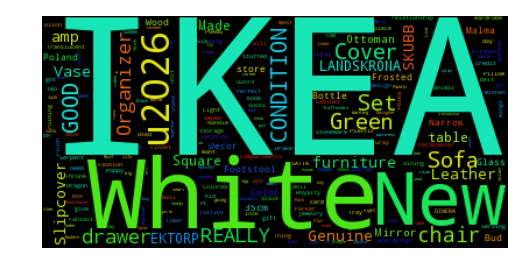

In [3]:


# Read the whole text.
dataTxt = open('ikeatweet.txt').read()
wordcloudSentiment = WordCloud().generate(dataTxt)
# Open a plot of the generated image.
plt.imshow(wordcloudSentiment)
plt.axis("off")
plt.show()

In [4]:
from nltk.tokenize import TweetTokenizer


In [5]:
# loading the positive words document
positive_sent = open("positive-words.txt").read()
positive_words=positive_sent.split('\n')
    
# loading the negative words document  
negative_sent = open('negative-words.txt').read()
negative_words=negative_sent.split('\n')
    
# loading the IKEA tweet dataset 
ikeatweets = open("ikeatweet.txt").read()
tweets_list = ikeatweets.split('\n')




In [6]:
# using nltk tokenizer 
tokenzr = TweetTokenizer()

tokenize_words=tokenzr.tokenize(ikeatweets)
tokenize_words

['b',
 'just',
 'had',
 'the',
 'most',
 'wonderful',
 'experience',
 'with',
 'my',
 'ikea',
 '3rd',
 'party',
 'delivery',
 'men',
 'and',
 'omg',
 'i',
 'am',
 'in',
 'LOVE',
 'b',
 'Now',
 'this',
 'is',
 'love',
 'lmao',
 'b',
 'IKEA',
 'was',
 'actually',
 'out',
 'of',
 'Detolf',
 'cabinets',
 'oops',
 'Supposedly',
 'another',
 'shipment',
 'is',
 'coming',
 'in',
 'Wed',
 'so',
 'I',
 'll',
 'check',
 'again',
 'then',
 'b',
 'Ikea',
 'has',
 'smart',
 'lights',
 'and',
 'now',
 'everyone',
 'will',
 'want',
 'one',
 'SmartLights',
 'SmartHome',
 'b',
 'adali',
 'Wish',
 'We',
 'lived',
 'close',
 'we',
 'd',
 'be',
 'all',
 'about',
 'chipotle',
 'gym',
 'life',
 'and',
 'ikea',
 'alllll',
 'the',
 'time',
 'lol',
 'b',
 'Ikea',
 'collection',
 'holds',
 'wireless',
 'phone',
 'charging',
 'furniture',
 'oldpost',
 'retweet',
 'b',
 'ikea',
 'field',
 'trip',
 'w',
 'b',
 'Why',
 'can',
 't',
 'I',
 'have',
 'an',
 'Ikea',
 'closer',
 'then',
 'an',
 'hour',
 'away',
 'Why',


In [7]:
# loading the positive words document
positive_sent = open("positive-words.txt").read()


# loading the negative words document  
negative_sent = open('negative-words.txt').read()


# Naive Bayes Classifer

In [8]:


#get the words that are inside the tweets list 
def get_words_within_tweets(tweets):
    entire_word_list = []
    for (words, sent_score) in tweets: # for word (key) and  score_sentiment (value) in tweet
        entire_word_list.extend(words) #adds items from the list of tweet to the end of entire_word_list
    return entire_word_list # return the entire list 

# get the word after counting them using NLTK FreqDist   
def get_word_variables(list_of_word):
    list_of_word = FreqDist(list_of_word)#count how many time each variable appears in the list
    word_variables = list_of_word.keys()# get the key of each variable ( the word)
    return word_variables # return the word available 



neg_sent = negative_sent.split() # get the list of negative words ( transformed into negative tweet is this case )
nega_tive = ['negative'] # negative
negative_tweets = [] # collect all negative tweets as tuples
for i in range(max((len(neg_sent),len(nega_tive)))):#for index in maximum range of neg_sent, nega_tive
    while True:
        try:    
            mergeList = (neg_sent[i],nega_tive[i])# merge items in positive and negative list 
        except IndexError: # rise exception if not true
            if len(neg_sent)>len(nega_tive): #if length of neg_sent is less than nega_tive list
                nega_tive.append('negative') # adds negative to the list nega_tive
                mergeList = (neg_sent[i],nega_tive[i])# merge both lits to form a tuple

            continue
        negative_tweets.append(mergeList) # add the merged list to the list of negative tweets
        break
     

pos_sent = positive_sent.split()# get the list of positive words ( transformed into positive tweet is this case )
posi_tive = ['positive']#positive
positive_tweets = [] # collect all positive tweets as tuples
for i in range(max((len(pos_sent),len(posi_tive)))): #if length of pos_sent is less than posi_tive list
    while True:
        try:
            mergeList = (pos_sent[i],posi_tive[i])# merge items in positive and negative list 
        except IndexError:  # rise exception if not true
            if len(pos_sent)>len(posi_tive): #if length of pos_sent is less than posi_tive list
                posi_tive.append('positive') # adds positive to the list posi_tive
                mergeList = (pos_sent[i],posi_tive[i]) # merge both lits to form a tuple

            continue
        positive_tweets.append(mergeList) # add the merged list to the list of positive tweets
        break

        
tweets = [] #collect all the tweets(positive, negative)
for (words, sent_score) in positive_tweets + negative_tweets:
    words_cleaned = [t.lower() for t in words.split() if len(t) >= 3] #remove very shord word
    tweets.append((words_cleaned, sent_score)) # append to tuples into the new list, tweets

    
    
#create a positive testing dataset using list tuples 
test_positive_tweets=[('I do like this pen','positive'), 
('This view  from the shard is amazing','positive'),
('I feel great this morning','positive'),
('They won a trophy','positive'),
('She is lovely ','positive'),
('They sell top-quality products','positive'),
('The sport is rewarding','positive'),
('I am so rich','positive'),
('Suisse is a non-violent contry','positive'),
('I am keen to learn','positive'),
('I am stable','positive'),
('that was a spectacular goal by far this season','positive'),
('This is a sophisticated weapon','positive'),
('I am so excited about this match so see you in the stadium','positive'),
('You are so splendid i will therefore invite you','positive'),
('I receive a bonus','positive'),
('I revitalize by this book','positive'),
('My best friend is brainy','positive')]



#create a negative testing dataset using list tuples
test_negative_tweets=[('I do not like this bike','negative'),
('This house is horrible','negative'),
('I feel tired this morning','negative'),
('I am not looking forward to seeing you','negative'),
('She dispute it','negative'),
('Daniel is hypocrites','negative'),
('she is not positive at all ','negative'),
('Go to hell','negative'),
('she has irritate me','negative'),
('North corea is isolated in the word','negative'),
('He is jealous ','negative'),
('This is an big issue','negative'),
('London water is impure','negative'),
('imprudence can cause damage','negative'),
('She is repulsing','negative'),
('the inaction of the word is concerning','negative'),
('It is not very promising','negative'),
('It is not true that I failed this module','negative'),
('He sues the University','negative')]




testing_tweets=[] #gather all the testing tweets 
for(test_words,test_sentiment)in test_positive_tweets+test_negative_tweets:
    cleaned_test_words =[t.lower() for t in test_words.split() if len(t)>=3] #remove very shord word
    testing_tweets.append((cleaned_test_words,test_sentiment)) # add the list of tuples into testing tweets
  
    
word_variables = get_word_variables(get_words_within_tweets(tweets))# call the previous functions
                                                                    # get_word_variable
                                                                    # get_words_within_tweets
                                                                    #store words
            
random.shuffle(tweets) 

def variables_extraction(corpora):
    corpora_words = set(corpora) #remove duplicate word by invoking "python set function"
    variables = {}
    for word in word_variables:
        variables['contains(%s)' % word] = (word in corpora_words) #find the word available
    return variables                                               #return the word found  




In [9]:
print("Please wait, it might take up to 5 minutes to train & load") #print
                       
#train the positive and negative words(tweets)   
train_set = apply_features(variables_extraction, tweets) 

# train the testing data set( )
test_train_set=apply_features(variables_extraction, testing_tweets) 

# train the NaiveBayes classifier using the training data
classifier = nltk.classify.NaiveBayesClassifier.train(train_set)
print("\n")
print("\n")

print("Classifier accuracy %: ",(nltk.classify.util.accuracy(classifier,test_train_set))*100)

print("\n")
print("\n")

#tweet = "Sean Daniel sucks"
#tweet = "If an officer acts outside the law, it serves only to undermine the hard work and sacrifice they make to keep this city safe"
tweet = dataTxt #use the download in the previous section of the assignment

# classify the tweets downloaded from the internet and stored in dataTxt
print("The text added is : ",classifier.classify(variables_extraction(tweet.split())))

print("\n")
print("\n")

#show most informative variables (features)
classifier.show_most_informative_features()


Please wait, it might take up to 5 minutes to train & load




Classifier accuracy %:  91.8918918918919




The text added is :  positive




Most Informative Features
       contains(envious) = True           positi : negati =      2.4 : 1.0
     contains(enviously) = True           positi : negati =      2.4 : 1.0
   contains(enviousness) = True           positi : negati =      2.4 : 1.0
       contains(leading) = False          negati : positi =      1.0 : 1.0
     contains(eagerness) = False          negati : positi =      1.0 : 1.0
     contains(rock-star) = False          negati : positi =      1.0 : 1.0
     contains(pain-free) = False          negati : positi =      1.0 : 1.0
    contains(skillfully) = False          negati : positi =      1.0 : 1.0
      contains(sociable) = False          negati : positi =      1.0 : 1.0
     contains(nurturing) = False          negati : positi =      1.0 : 1.0
